# Feux de forets en France

Le but de ce notebook est d'analyser l'évolution des feux de forets en france au cours du temps.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('export_BDIFF_incendies_20220718.csv', skiprows=5, sep=';')
df['Month'] = pd.to_datetime(df['Date de première alerte']).dt.month
df['Hectares'] = df['Surface brûlée (m2)'] / 10000
df.shape

(41587, 16)

In [3]:
df.head()

,Année,Numéro,Département,Code INSEE,Commune,Date de première alerte,Surface brûlée (m2),Surface forêt (m2),Surface autres terres boisées (m2),Surfaces non boisées naturelles (m2),Surfaces non boisées artificialisées (m2),Surfaces non boisées (m2),Précision des surfaces,Statut,Month,Hectares
0,2006,2,01,01148,Dortan,2006-02-27 13:56:00,10000,0.0,10000.0,0.0,0.0,0.0,NaN,Validé en force,2,1.0
1,2006,3,01,01321,Revonnas,2006-03-15 16:02:00,10000,0.0,10000.0,0.0,0.0,0.0,NaN,Validé en force,3,1.0
2,2006,4,01,01032,Béligneux,2006-03-16 17:03:00,10000,0.0,10000.0,0.0,0.0,0.0,NaN,Validé en force,3,1.0
3,2006,5,01,01109,Collonges,2006-03-27 14:30:00,10000,0.0,10000.0,0.0,0.0,0.0,NaN,Validé en force,3,1.0
4,2006,6,01,01384,Saint-Rambert-en-Bugey,2006-04-24 16:43:00,20000,0.0,20000.0,0.0,0.0,0.0,NaN,Validé en force,4,2.0


In [4]:
fireByYear = pd.DataFrame(df['Année'].value_counts(sort=False))
surfaceByYear = pd.DataFrame(df.groupby('Année').sum()['Hectares'])
fireByYear = fireByYear.merge(surfaceByYear, left_index=True, right_index=True)
fireByYear.columns = ['Nombres de feu', 'Hectares brulées']

fireByMonth = pd.DataFrame(df['Month'].value_counts(sort=False))
surfaceByMonth = pd.DataFrame(df.groupby('Month').sum()['Hectares'])
fireByMonth = fireByMonth.merge(surfaceByMonth, left_index=True, right_index=True)
fireByMonth.columns = ['Nombres de feu', 'Hectares brulées']

fireByDep = df['Département'].value_counts()

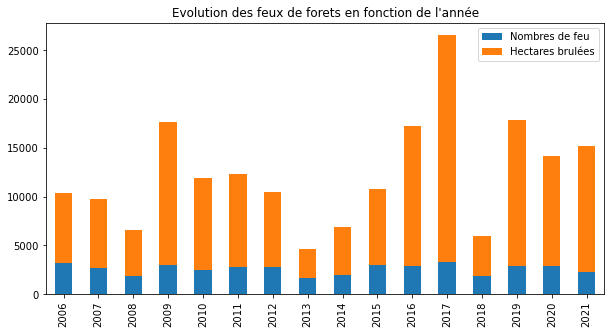

In [5]:
#plot a double bar chart of NombreDeFeu and Hectares by year
fireByYear.plot(kind='bar', stacked=True ,figsize=(10,5), title="Evolution des feux de forets en fonction de l'année")
plt.show()

On constate une légere augmentation des feux au fil des années.

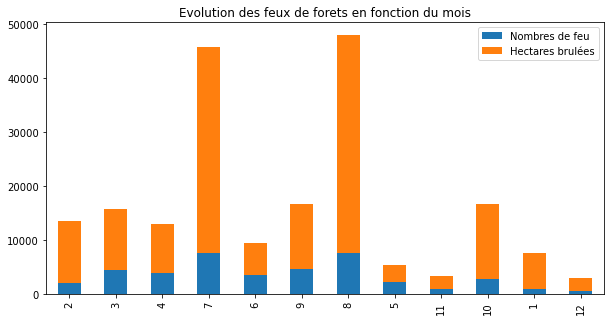

In [6]:
#plot a double bar chart of NombreDeFeu and Hectares by month
fireByMonth.plot(kind='bar', stacked=True ,figsize=(10,5), title='Evolution des feux de forets en fonction du mois')
plt.show()

Logiquement, on constate que les feux de forets sont plus présents durant les periodes estivals.

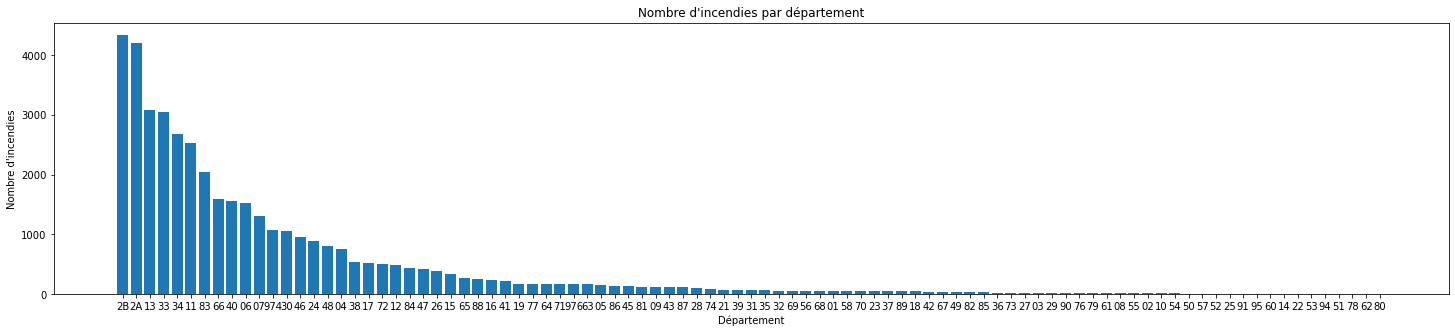

In [7]:
# fire by dep
plt.figure(figsize=(25, 5))
plt.bar(fireByDep.index, fireByDep.values)
plt.title('Nombre d\'incendies par département')
plt.xlabel('Département')
plt.ylabel('Nombre d\'incendies')
plt.show()